In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [5]:
data=pd.read_csv("uber-raw-data-sep14.csv")

In [15]:
data["Date/Time"] =  pd.to_datetime(data["Date/Time"])
sns.set(rc={'figure.figsize':(12, 10)})

In [16]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [20]:
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())


In [21]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)


In [22]:
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Hour  Weekday
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1     0        0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1     0        0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1     0        0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1     0        0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1     0        0


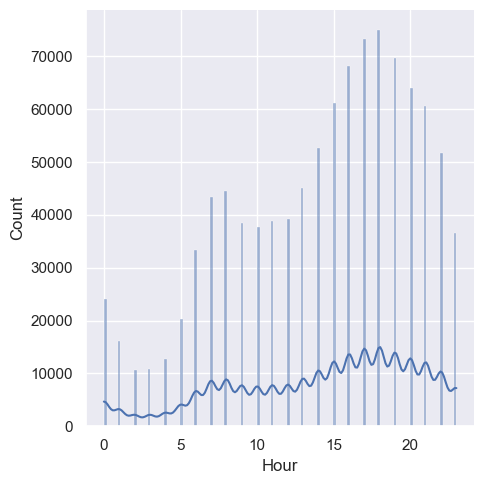

In [25]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.displot(data["Hour"], kde=True)

<Axes: xlabel='Hour', ylabel='Count'>

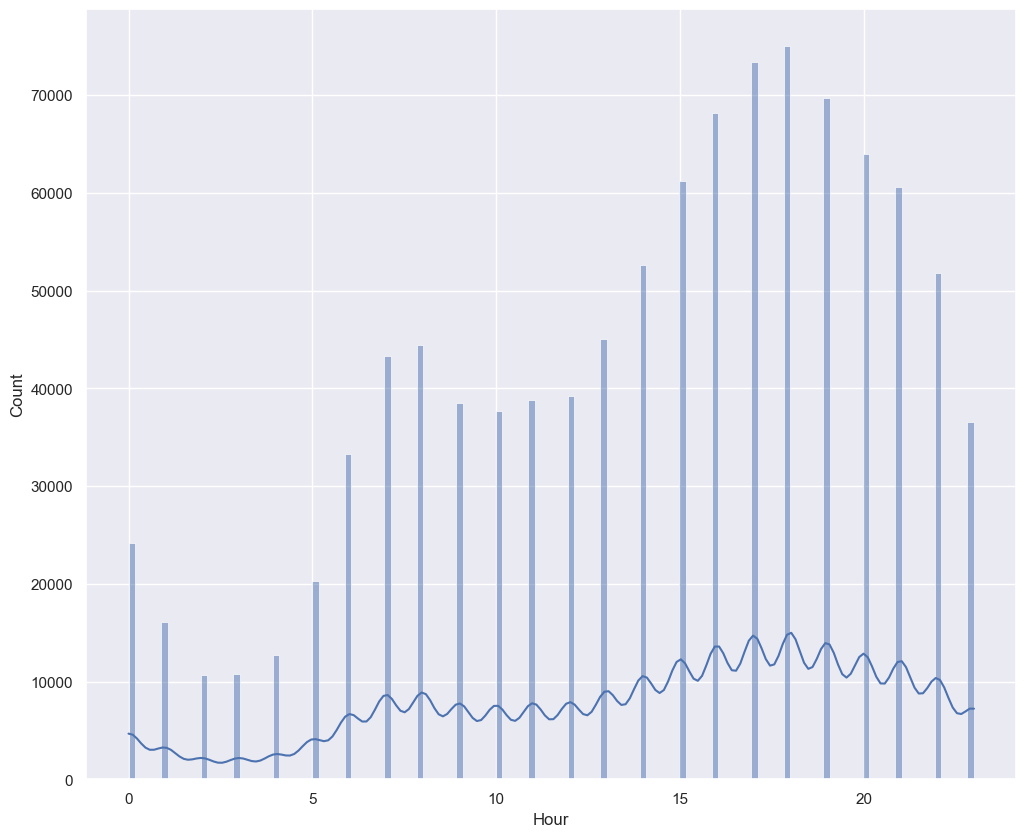

In [27]:
sns.histplot(data["Hour"], kde=True)

<Axes: xlabel='Weekday', ylabel='Count'>

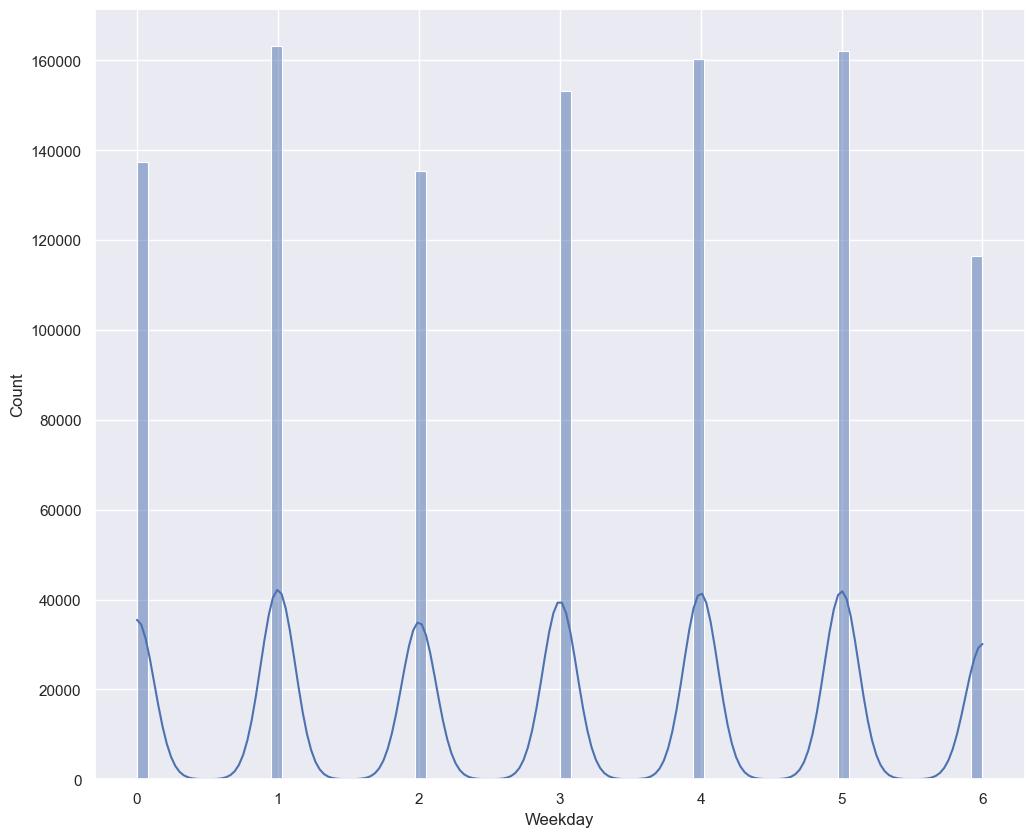

In [29]:
sns.histplot(data["Weekday"], kde=True)  

<Axes: xlabel='Hour', ylabel='Weekday'>

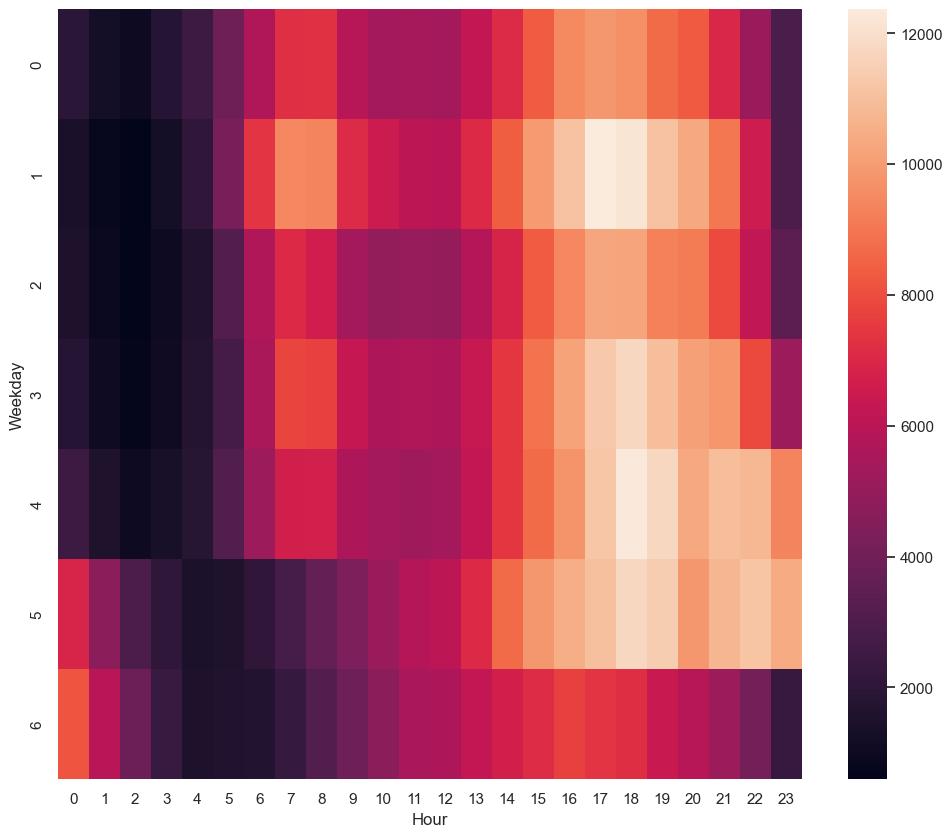

In [38]:
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)


C:\Users\babum\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


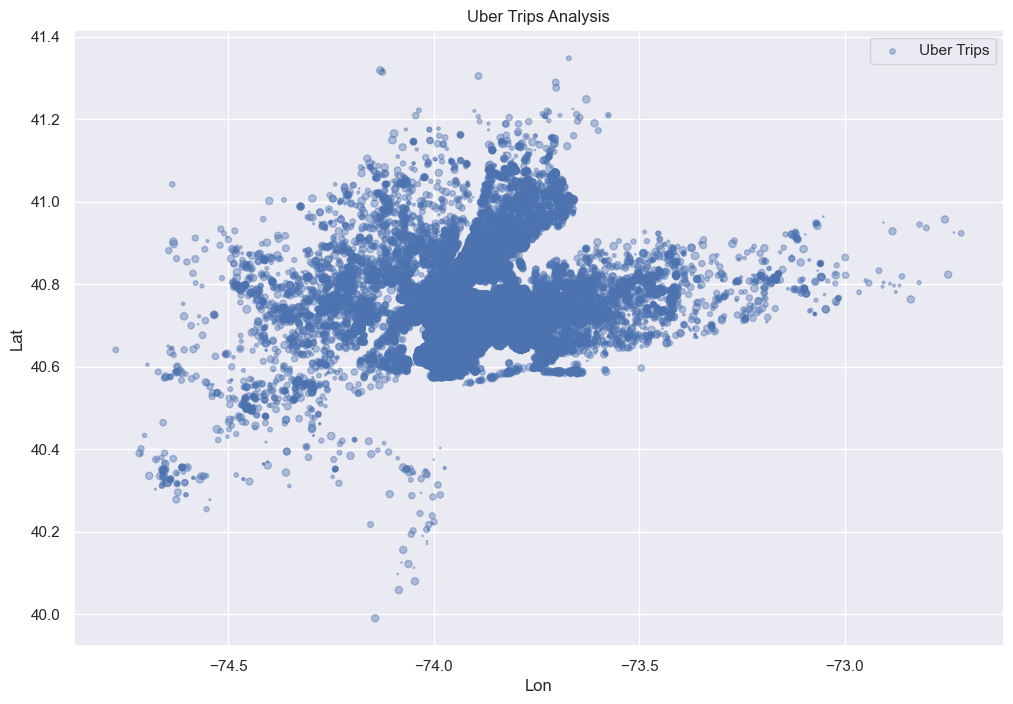

In [39]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()